# Árboles de Decisión - Dataset de Depresión
Basado en el estilo de `Arboles_IA_Ejemplo1 2025.ipynb`

In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import sklearn.model_selection
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

In [38]:
# Cargar el archivo de datos
df = pd.read_csv('depression.csv')
df.head()

,Gender,Age,CGPA,Sleep Duration,Degree,Suicidal Thoughts,Work/Study Hours,Family History of Mental Illness,Depression
0,Male,33.0,8.97,5-6 hours,Undergraduate,Yes,3.0,No,1
1,Female,24.0,5.90,5-6 hours,Undergraduate,No,3.0,Yes,0
2,Male,31.0,7.03,Less than 5 hours,Undergraduate,No,9.0,Yes,0
3,Female,28.0,5.59,7-8 hours,Undergraduate,Yes,4.0,Yes,1
4,Female,25.0,8.13,5-6 hours,Postgraduate,Yes,1.0,No,0


In [39]:
from sklearn.model_selection import train_test_split
N = len(df)
cTrain = int(N * 0.8)
cTest = N - cTrain
print(f"Total: {N}, Entrenamiento: {cTrain}, Prueba: {cTest}")

train_data, test_data = sklearn.model_selection.train_test_split(
    df, train_size=cTrain, random_state=123)

X_train = train_data.drop('Depression', axis=1)
y_train = train_data['Depression']
X_test = test_data.drop('Depression', axis=1)
y_test = test_data['Depression']

Total: 27901, Entrenamiento: 22320, Prueba: 5581


In [ ]:
# Preprocesamiento de datos
num_features = ['Age', 'CGPA', 'Work/Study Hours']
cat_features = ['Gender', 'Sleep Duration', 'Degree', 'Suicidal Thoughts', 'Family History of Mental Illness']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop=None, handle_unknown='ignore')


preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

## Árboles con Criterion = 'gini'

[0.78068996 0.78248208 0.78405018 0.78001792 0.78897849]
0.7832437275985663
[0.78068996 0.78248208 0.78405018 0.78001792 0.78897849]
0.7832437275985663
[0.78091398 0.78248208 0.78068996 0.77755376 0.78897849]
0.7821236559139784
[0.78270609 0.78584229 0.78449821 0.78158602 0.79121864]
0.7851702508960574
[0.77979391 0.78181004 0.78158602 0.77956989 0.79032258]
0.7826164874551971
[0.77800179 0.78405018 0.78293011 0.78001792 0.78785842]
0.7825716845878137
[0.77710573 0.78337814 0.77643369 0.77732975 0.78718638]
0.7802867383512545
[0.78024194 0.77598566 0.77822581 0.77710573 0.77956989]
0.778225806451613
[0.77307348 0.77307348 0.7703853  0.77195341 0.77374552]
0.7724462365591398
[0.76702509 0.76635305 0.76814516 0.7672491  0.76747312]
0.7672491039426523


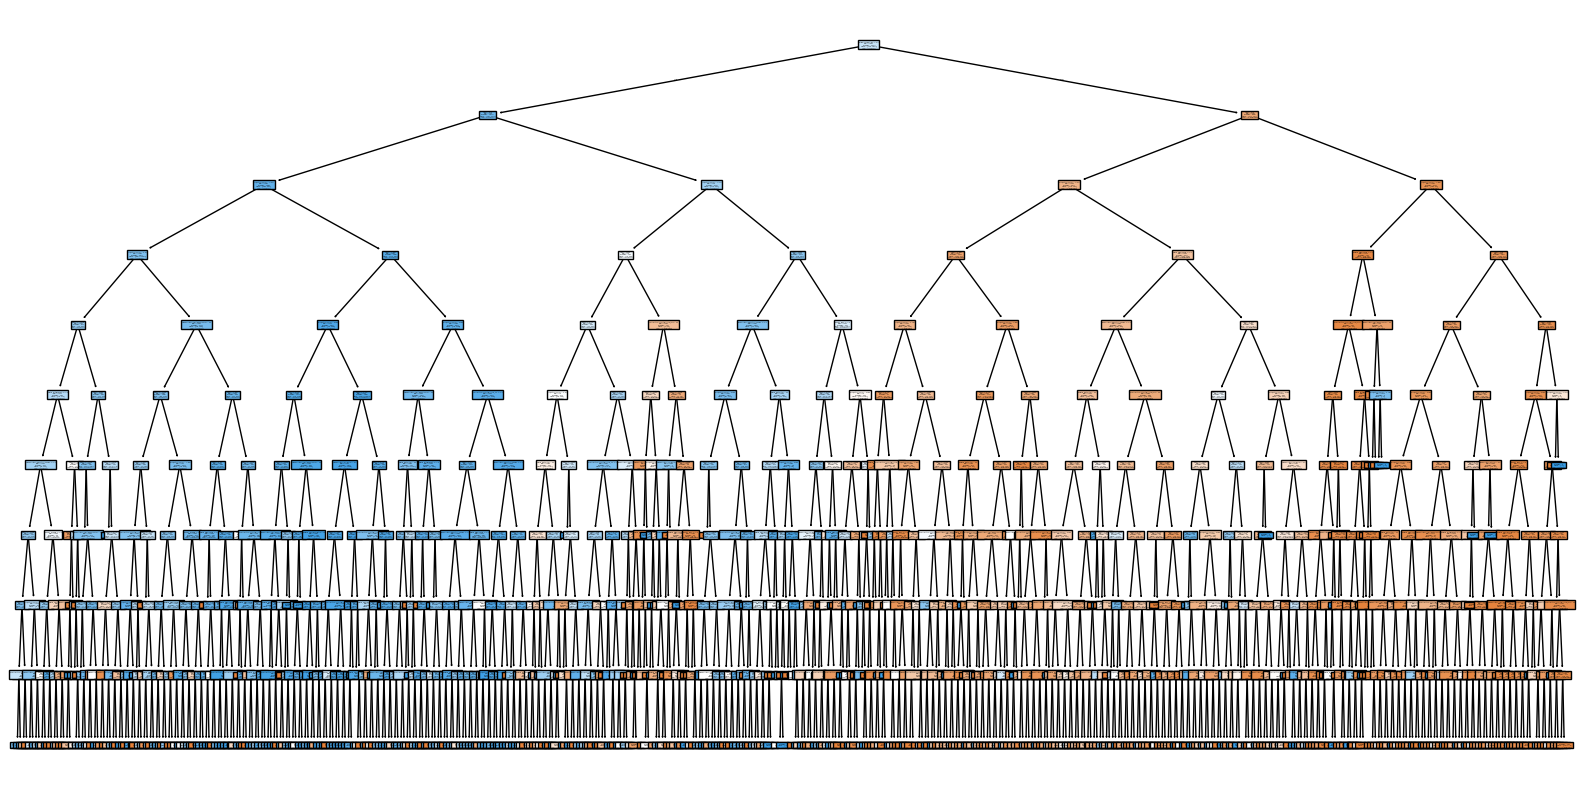

,max_depth,accuracy
0,1,0.777818
1,2,0.777818
2,3,0.777818
3,4,0.781401
4,5,0.779609
5,6,0.782297
6,7,0.779072
7,8,0.778713
8,9,0.776743
9,10,0.768500


In [41]:
from sklearn.model_selection import cross_val_score

resultados_gini = []
for d in range(1, 11):
    modelo1 = Pipeline([
        ('pre', preprocessor),
        ('tree', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=123))
    ])
    modelo1.fit(X_train, y_train)
    score1 = cross_val_score(modelo1, X_train, y_train, cv=5, scoring='accuracy')
    print(score1)
    print(score1.mean())
    pred = modelo1.predict(X_test)
    acc = accuracy_score(y_test, pred)
    resultados_gini.append({'max_depth': d, 'accuracy': acc})

# Visualización del árbol para el último modelo entrenado
plt.figure(figsize=(20,10))
plot_tree(
    modelo1.named_steps['tree'],
    filled=True,
    feature_names=num_features + list(preprocessor.transformers_[1][1].get_feature_names_out()),
    class_names=['No Depression', 'Depression']
)
plt.show()

# Exportar el árbol a un archivo DOT
from sklearn.tree import export_graphviz
export_graphviz(
    modelo1.named_steps['tree'],
    out_file="Arbol_Depresion.dot",
    feature_names=num_features + list(preprocessor.transformers_[1][1].get_feature_names_out()),
    class_names=['No Depression', 'Depression'],
    filled=True
)

pd.DataFrame(resultados_gini)

## Árboles con Criterion = 'entropy'

[0.78068996 0.78248208 0.78405018 0.78001792 0.78897849]
0.7832437275985663
[0.78068996 0.78248208 0.78405018 0.78001792 0.78897849]
0.7832437275985663
[0.78068996 0.78248208 0.78068996 0.77755376 0.78897849]
0.7820788530465949
[0.78315412 0.78584229 0.78449821 0.78158602 0.79121864]
0.7852598566308244
[0.78337814 0.78203405 0.78203405 0.77979391 0.79032258]
0.7835125448028674
[0.78203405 0.78405018 0.78405018 0.77844982 0.78741039]
0.7831989247311829
[0.77688172 0.78270609 0.77956989 0.77822581 0.78629032]
0.7807347670250897
[0.77240143 0.77755376 0.77889785 0.77755376 0.78360215]
0.7780017921146954
[0.76948925 0.77217742 0.77374552 0.77352151 0.77643369]
0.773073476702509
[0.76747312 0.76747312 0.77172939 0.76814516 0.77217742]
0.769399641577061


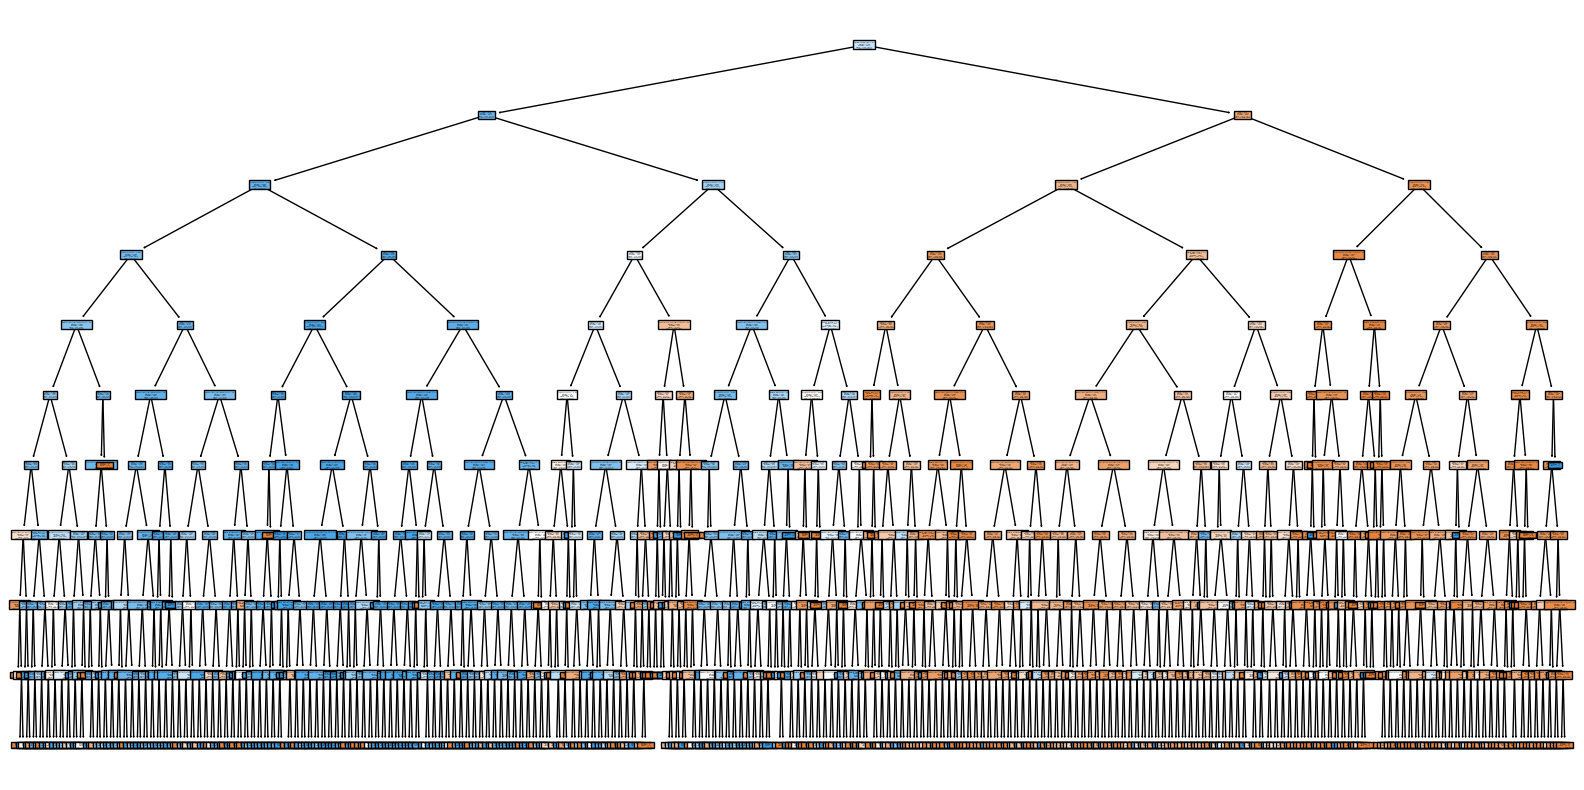

,max_depth,accuracy
0,1,0.777818
1,2,0.777818
2,3,0.777818
3,4,0.781401
4,5,0.779609
5,6,0.781580
6,7,0.778534
7,8,0.776026
8,9,0.772084
9,10,0.767604


In [42]:
from sklearn.model_selection import cross_val_score

resultados_entropy = []
for d in range(1, 11):
    modelo2 = Pipeline([
        ('pre', preprocessor),
        ('tree', DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=d, random_state=123))
    ])
    modelo2.fit(X_train, y_train)
    score2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='accuracy')
    print(score2)
    print(score2.mean())
    pred = modelo2.predict(X_test)
    acc = accuracy_score(y_test, pred)
    resultados_entropy.append({'max_depth': d, 'accuracy': acc})

# Visualización del árbol para el último modelo entrenado
plt.figure(figsize=(20,10))
plot_tree(
    modelo2.named_steps['tree'],
    filled=True,
    feature_names=num_features + list(preprocessor.transformers_[1][1].get_feature_names_out()),
    class_names=['No Depression', 'Depression']
)
plt.show()

# Exportar el árbol a un archivo DOT
from sklearn.tree import export_graphviz
export_graphviz(
    modelo2.named_steps['tree'],
    out_file="Arbol_Depresion.dot",
    feature_names=num_features + list(preprocessor.transformers_[1][1].get_feature_names_out()),
    class_names=['No Depression', 'Depression'],
    filled=True
)

pd.DataFrame(resultados_entropy)

## Variación del hiperparámetro: `min_samples_split`

In [47]:
for split in [5, 20, 100]:
    modelo = Pipeline([
        ('pre', preprocessor),
        ('tree', DecisionTreeClassifier(
            criterion='entropy', splitter='best', max_depth=5,
            min_samples_split=split, random_state=123))
    ])
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"min_samples_split = {split} => Accuracy: {acc:.4f}")

min_samples_split = 5 => Accuracy: 0.7796
min_samples_split = 20 => Accuracy: 0.7796
min_samples_split = 100 => Accuracy: 0.7796


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for depth in [3, 5, 10]:
    for split in [2, 10]:
        for leaf in [1, 5, 10]:
            modelo = Pipeline([
                ('pre', preprocessor),
                ('tree', DecisionTreeClassifier(
                    criterion='entropy',
                    splitter='best',
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    random_state=123
                ))
            ])
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"depth={depth} | split={split} | leaf={leaf} => acc={acc:.4f}")

              

depth=3 | split=2 | leaf=1 => acc=0.7778
depth=3 | split=2 | leaf=5 => acc=0.7778
depth=3 | split=2 | leaf=10 => acc=0.7778
depth=3 | split=10 | leaf=1 => acc=0.7778
depth=3 | split=10 | leaf=5 => acc=0.7778
depth=3 | split=10 | leaf=10 => acc=0.7778
depth=5 | split=2 | leaf=1 => acc=0.7796
depth=5 | split=2 | leaf=5 => acc=0.7796
depth=5 | split=2 | leaf=10 => acc=0.7796
depth=5 | split=10 | leaf=1 => acc=0.7796
depth=5 | split=10 | leaf=5 => acc=0.7796
depth=5 | split=10 | leaf=10 => acc=0.7796
depth=10 | split=2 | leaf=1 => acc=0.7676
depth=10 | split=2 | leaf=5 => acc=0.7647
depth=10 | split=2 | leaf=10 => acc=0.7642
depth=10 | split=10 | leaf=1 => acc=0.7681
depth=10 | split=10 | leaf=5 => acc=0.7647
depth=10 | split=10 | leaf=10 => acc=0.7642
